<h1 style="text-align: center;">Проект: Обучение с учителем: качество модели</h1>

Интернет-магазин **«В один клик»** продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

**Цель** - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Руководитель отдела его уже сформировал подход к решению данной задачи:

Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

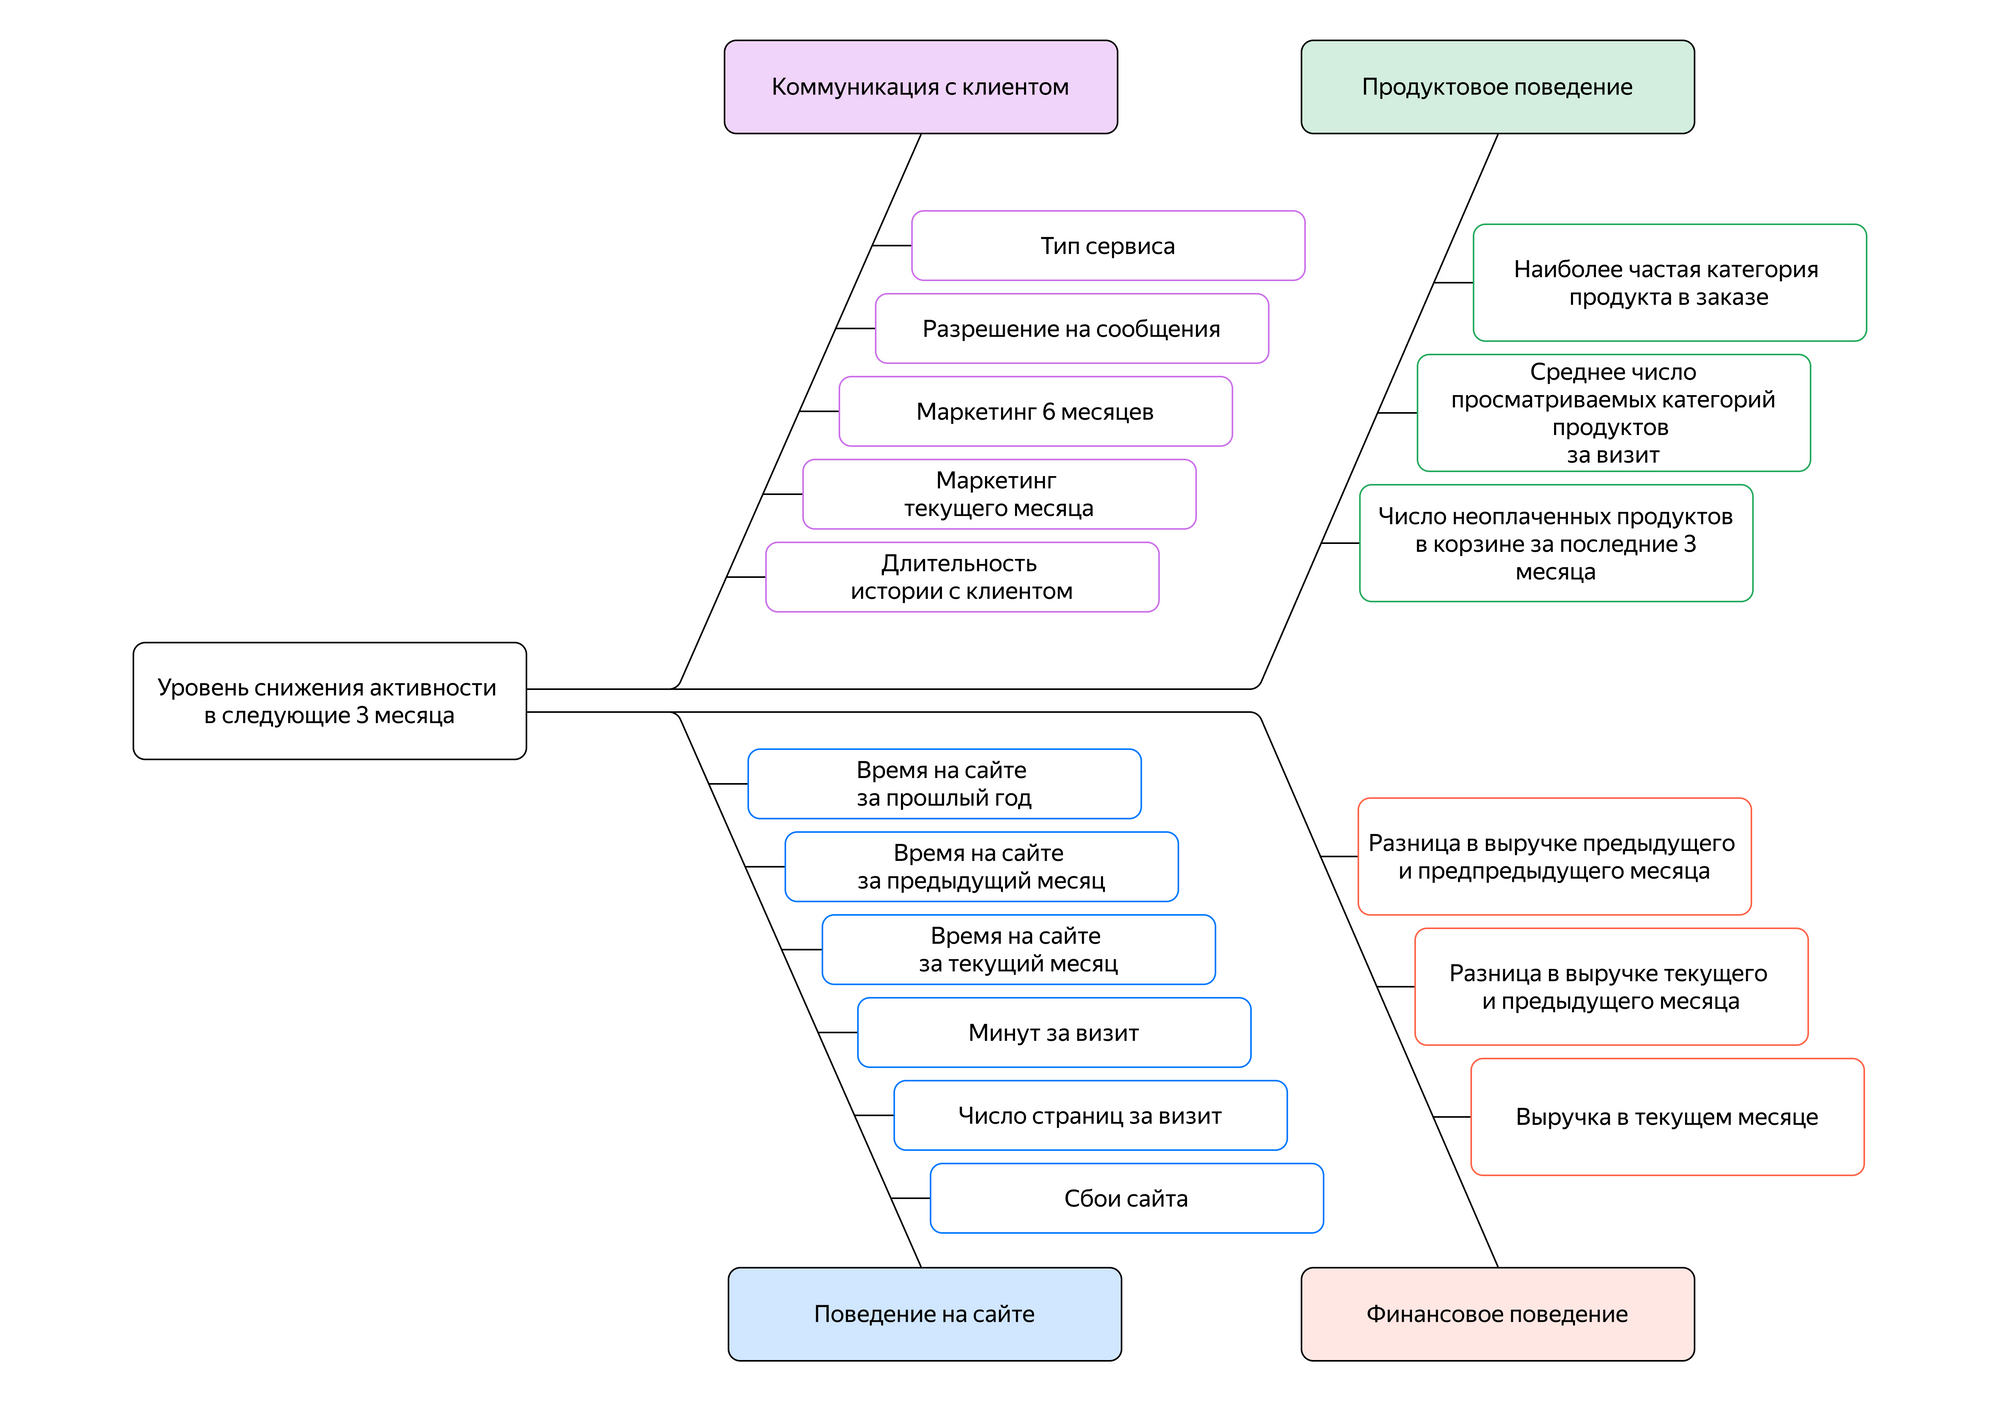

1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Описание данных

### main_df: Поведение покупателя на сайте

`market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

Столбец                              | name                    | Значение
-------------------------------------|-------------------------|-------------------------------------------------------
id                                   | id                      | номер покупателя в корпоративной базе данных
Тип сервиса                          | service_type            | уровень сервиса, например «премиум» и «стандарт»
Разрешить сообщать                   | allow_reporting         | информация о том, можно ли присылать покупателю дополнительные предложения о товаре
Маркет_актив_6_мес                   | mark_comm_6_month       | среднемесячное значение маркетинговых коммуникаций компании
Маркет_актив_тек_мес                 | mark_comm_curr_month    | количество маркетинговых коммуникаций в текущем месяце
Длительность                         | duration                | сколько дней прошло с момента регистрации покупателя на сайте
Акционные_покупки                    | promo_purchases         | среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев
Популярная_категория                 | pop_category            | самая популярная категория товаров у покупателя за последние 6 месяцев
Средний_просмотр_категорий_за_визит  | mview_cats_per_visit    | сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца
Неоплаченные_продукты_штук_квартал   | unpaid_products_quarter | общее число неоплаченных товаров в корзине за последние 3 месяца
Ошибка_сервиса                       | service_error           | число сбоев, которые коснулись покупателя во время посещения сайта
Страниц_за_визит                     | pages_per_visit         | среднее кол-во страниц, просмотренные за один визит на сайт за последние 3 месяца
**Покупательская активность**        | **buying_activity**     | рассчитанный класс покупательской активности (целевой признак)

Уточнения:
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

### total_income_df: Выручка с покупателя за весь период

`market_money.csv` - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

Столбец | name   | Значение
--------|--------|-------------------------------------------------------
id      | id     | номер покупателя в корпоративной базе данных
Период  | period | название периода, во время которого зафиксирована выручка
Выручка | income | сумма выручки за период

### time_df: Время, проведенное на сайте

`market_time.csv` - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

Столбец | name    | Значение
--------|---------|-------------------------------------------------------
id      | id      | номер покупателя в корпоративной базе данных
Период  | period  | название периода, во время которого зафиксировано общее время
минут   | minutes | значение времени, проведённого на сайте, в минутах

### monthly_profit_df: Среднемесячная прибыль с покупателя

`money.csv` - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Столбец | name    | Значение
--------|---------|-------------------------------------------------------
id      | id      | номер покупателя в корпоративной базе данных
Прибыль | profit  | значение прибыли

## Импорт необходимых библиотек

In [21]:
pip install phik

In [22]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    OrdinalEncoder, 
    MinMaxScaler, 
    LabelEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# импортируем модель
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

## Загрузка данных

In [26]:
try:

    main_df = pd.read_csv('./datasets/market_file.csv')
    total_income_df = pd.read_csv('./datasets/market_money.csv')
    time_df = pd.read_csv('./datasets/market_time.csv')
    monthly_profit_df = pd.read_csv('./datasets/money.csv', sep=';', decimal=',')


except:
    main_df = pd.read_csv('/datasets/market_file.csv')
    total_income_df = pd.read_csv('/datasets/market_money.csv')
    time_df = pd.read_csv('/datasets/market_time.csv')
    monthly_profit_df = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [27]:
main_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [28]:
total_income_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [29]:
time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [30]:
monthly_profit_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Все данные успешно загружены и соответстуют описанию задачи. Однако таблицы необходимо преобразовать согласно стандартам оформления данных, а именно переименовать столбцы.

In [32]:
main_columns = {
    'id':'id',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_reporting',
    'Маркет_актив_6_мес': 'mark_comm_6_month',
    'Маркет_актив_тек_мес': 'mark_comm_curr_month',
    'Длительность': 'duration',
    'Акционные_покупки': 'promo_purchases',
    'Популярная_категория': 'pop_category',
    'Средний_просмотр_категорий_за_визит': 'mview_cats_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_quarter',
    'Ошибка_сервиса': 'service_error',
    'Страниц_за_визит': 'pages_per_visit',
    'Покупательская активность': 'buying_activity'
}

main_df = main_df.rename(columns=main_columns)
main_df.head()

,id,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,unpaid_products_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [33]:
total_income_columns = {
    'id': 'id',
    'Период': 'period', 
    'Выручка': 'income'
}

total_income_df = total_income_df.rename(columns=total_income_columns)
total_income_df.head()

,id,period,income
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [34]:
time_columns = {
    'id': 'id',
    'Период': 'period', 
    'минут': 'minutes'
}

time_df = time_df.rename(columns=time_columns)
time_df.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [35]:
monthly_profit_df = monthly_profit_df.rename(columns={'Прибыль':'profit'})
monthly_profit_df.head()

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Все столбцы успешно переименованы.

## Предобработка данных

### main_df

In [39]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   buying_activity          1300 non-null   object 
 2   service_type             1300 non-null   object 
 3   allow_reporting          1300 non-null   object 
 4   mark_comm_6_month        1300 non-null   float64
 5   mark_comm_curr_month     1300 non-null   int64  
 6   duration                 1300 non-null   int64  
 7   promo_purchases          1300 non-null   float64
 8   pop_category             1300 non-null   object 
 9   mview_cats_per_visit     1300 non-null   int64  
 10  unpaid_products_quarter  1300 non-null   int64  
 11  service_error            1300 non-null   int64  
 12  pages_per_visit          1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


Пропусков в таблице не наблюдается, все признаки имеют корректный тип данных. Для экономии памяти переведем столбцы с типом `int64` в тип `int32`.

In [41]:
int_columns = ['id', 'mark_comm_curr_month', 'duration', 'mview_cats_per_visit', 
               'unpaid_products_quarter', 'service_error', 'pages_per_visit']

main_df[int_columns] = main_df[int_columns].astype('int32')

Проверим наличие явных дубликатов.

In [43]:
main_df.duplicated().sum()

0

Явных дубликатов не обнаружено. Поищем неявные.

In [45]:
cat_columns = ['buying_activity', 'service_type', 'allow_reporting', 'pop_category']

for col in cat_columns:
    print(col, ':', main_df[col].unique())
    print()

buying_activity : ['Снизилась' 'Прежний уровень']

service_type : ['премиум' 'стандартт' 'стандарт']

allow_reporting : ['да' 'нет']

pop_category : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



В столбце `service_type` наблюдаем опечатку, исправим её.

In [47]:
main_df['service_type'] = main_df['service_type'].replace('стандартт', 'стандарт')
print('service_type :', main_df['service_type'].unique())

service_type : ['премиум' 'стандарт']


Ещё раз проверим наличие явных дубликатов.

In [49]:
main_df.duplicated().sum()

0

### total_income_df

In [51]:
total_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3900 non-null   int64  
 1   period  3900 non-null   object 
 2   income  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Пропусков в таблице не наблюдается, все признаки имеют корректный тип данных. Для экономии памяти переведем столбцы с типом `int64` в тип `int32`. Проверим наличие явных и неявных дубликатов.

In [53]:
total_income_df['id'] = total_income_df['id'].astype('int32')

In [54]:
total_income_df.duplicated().sum()

0

In [55]:
total_income_df['period'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Исправим опечатку в слове "препредыдущий" на "преДпредыдущий".

In [57]:
total_income_df['period'] = total_income_df['period'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')
total_income_df['period'].unique()

array(['предпредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Снова проверим наличие явных дубликатов.

In [59]:
total_income_df.duplicated().sum()

0

Дубликаты не обнаружены.

### time_df

In [62]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Пропусков в таблице не наблюдается, все признаки имеют корректный тип данных. Для экономии памяти переведем столбцы с типом `int64` в тип `int32`. Проверим наличие явных и неявных дубликатов.

In [64]:
time_df[['id', 'minutes']] = time_df[['id', 'minutes']].astype('int32')

In [65]:
time_df.duplicated().sum()

0

In [66]:
time_df['period'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Наблюдаем опечатку, исправим её.

In [68]:
time_df['period'] = time_df['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')
time_df['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Дубликаты устранены.

### monthly_profit_df

In [71]:
monthly_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропусков в таблице не наблюдается, все признаки имеют корректный тип данных. Для экономии памяти переведем столбцы с типом `int64` в тип `int32`. Проверим наличие явных дубликатов.

In [73]:
monthly_profit_df['id'] = monthly_profit_df['id'].astype('int32')

In [74]:
monthly_profit_df.duplicated().sum()

0

Дубликаты не обнаружены.

In [76]:
monthly_profit_df['profit'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: profit, dtype: float64

Отметим, что значения среднемесяного дохода варьируются от 0.8 до 7.4, маловероятно, что маркет получает с пользователей копейки. Сделаем предположение, что значения указаны в тысячах рублей, поэтому переведём значения в рубли, умножив на тысячу.

In [78]:
monthly_profit_df['profit'] = monthly_profit_df['profit'] * 1000

In [79]:
monthly_profit_df['profit'].describe()

count    1300.000000
mean     3996.630769
std      1013.722112
min       860.000000
25%      3300.000000
50%      4045.000000
75%      4670.000000
max      7430.000000
Name: profit, dtype: float64

### Промежуточные выводы

- в таблице `main_df` 1300 записей без пропусков и дубликатов
- в таблице `total_income_df` 3895 записей, устранены опечатки, пропусков и дубликатов нет
- в таблице `time_df` 2600 записей, устранены опечатки, без пропусков и дубликатов
- в таблице `monthly_profit_df` 1300 записей без пропусков и дубликатов, значения дохода переведены из тысяч рублей в рубли

## Исследовательский анализ данных

### main_df

In [83]:
main_df.head()

,id,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,unpaid_products_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Создадим списки категориальных и количественных признаков.

In [85]:
main_cat_columns = main_df.select_dtypes(exclude='number').columns.tolist()
main_num_columns = main_df.select_dtypes(include='number').columns.tolist()
main_num_columns.remove('id')

Построим ящики с усами для всех количественных признаков.

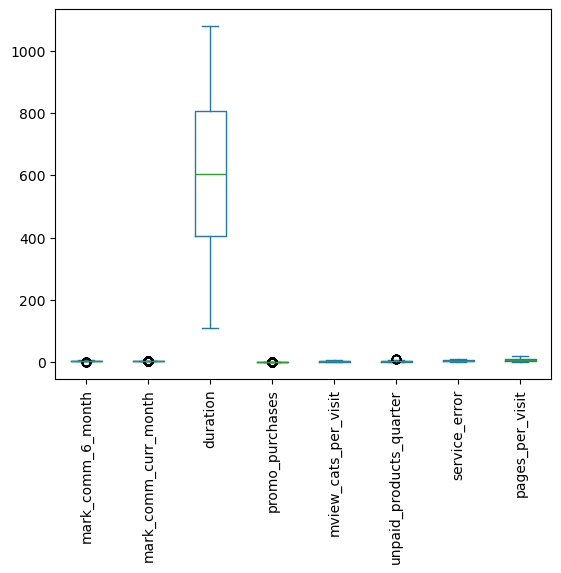

In [87]:
main_df[main_num_columns].plot.box(rot=90);

Только один признак "длительность" отличается масштабом от остальных. Длительность измеряется в днях, переведем дни в годы, тогда масштаб станет близок к остальным признакам.

In [89]:
main_df['duration'] = main_df['duration'] / 365

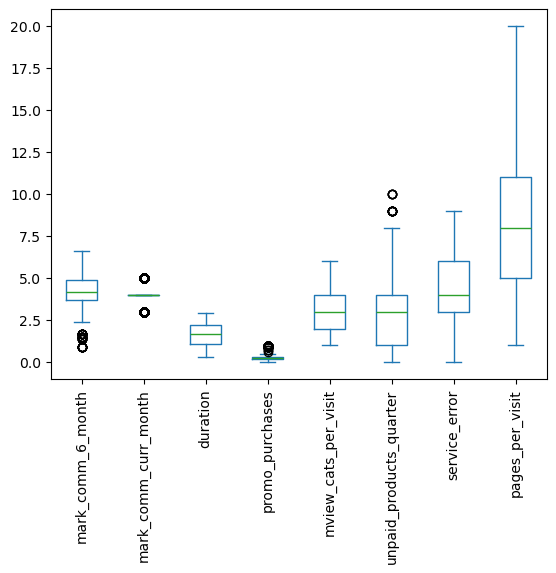

In [90]:
main_df[main_num_columns].plot.box(rot=90);

Наблюдаются выбросы в признаках mark_comm_6_month, mark_comm_curr_month, promo_purchases, unpaid_products_quarter. Рассмотрим их детальнее.

In [92]:
def print_boxplot(df, column, title, x):
    '''
        Функция строит ящих с усами для отдельного столбца таблицы.
    '''
    fig = plt.figure(figsize=(7,2))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.xlabel(x)
    plt.yticks([])
    plt.show();

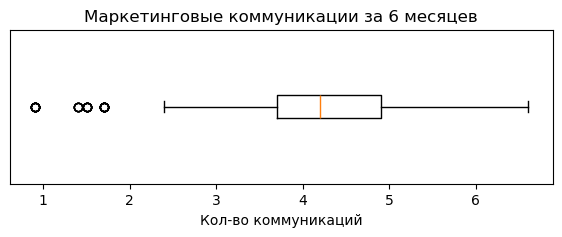

In [93]:
print_boxplot(main_df, 'mark_comm_6_month', 'Маркетинговые коммуникации за 6 месяцев', 'Кол-во коммуникаций')

In [94]:
main_df[main_df['mark_comm_6_month'] < 2]['mark_comm_6_month'].count()

36

Наблюдаем 36 записей со значением коммуникаций менее 2. Безусловно это редкость, тем не менее такие значения вполне реальны, поэтому оставим их в рассмотрении. Посмотрим на распределение признака.

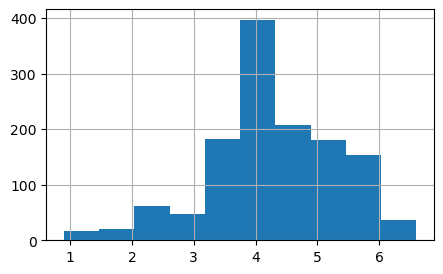

In [96]:
main_df['mark_comm_6_month'].hist(figsize=(5,3));

Распределение стремиться к нормальному, однако имеется резкий скачок на значении 4, стоит обратить на него внимание.

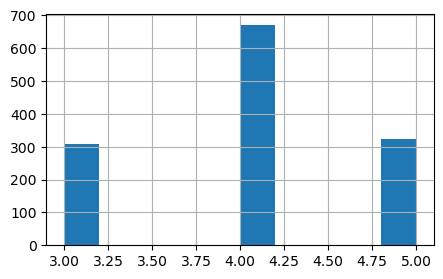

In [98]:
main_df['mark_comm_curr_month'].hist(figsize=(5,3));

In [99]:
main_df['mark_comm_curr_month'].value_counts()

mark_comm_curr_month
4    669
5    323
3    308
Name: count, dtype: int64

Также как и в коммуникациях за 6 месяцев, в текущем месяце лидирует значение 4 раза. Вполовину меньше по частоте происходят коммуникации в 3 и 5 раз. Выбросов не наблюдается.

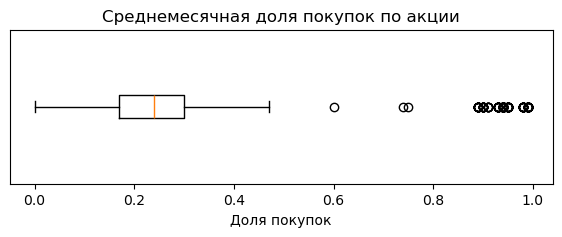

In [101]:
print_boxplot(main_df, 'promo_purchases', 'Среднемесячная доля покупок по акции', 'Доля покупок')

In [102]:
main_df[main_df['promo_purchases'] > 0.5]['promo_purchases'].count()

168

Больше половины покупок сделанных по акции определенно редкость, но также такие ситуации вполне реальны, поэтому оставим их в рассмотрении. Посмотрим на распределение признака.

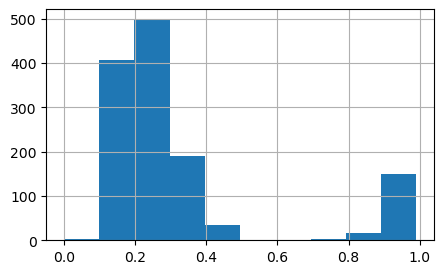

In [104]:
main_df['promo_purchases'].hist(figsize=(5,3));

Покупателей можно разделить на две группы: те, кто делает менее половины покупок по акции и те, кто делает более половины покупок по акции. Большая часть покупателей совершает менее половины покупок по акции. Чаще всего покупатели совершают около трети покупок по акции.

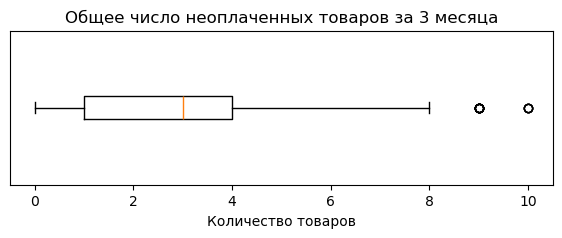

In [106]:
print_boxplot(main_df, 'unpaid_products_quarter', 'Общее число неоплаченных товаров за 3 месяца', 'Количество товаров')

In [107]:
main_df[main_df['unpaid_products_quarter'] > 8]['unpaid_products_quarter'].count()

14

Количество данных выбросов также не велико и их значение не сильно отличаются от остальных, оставляем их в рассмотрении. Посмотрим на распределение признака.

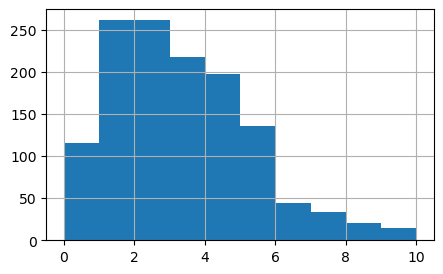

In [109]:
main_df['unpaid_products_quarter'].hist(figsize=(5,3), bins=10);

Распределение стремится к нормальному, самое часто встречаемое значение 2-3 неоплаченных товара.

Посмотрим как распределены оставшиеся категориальные признаки без выбросов.

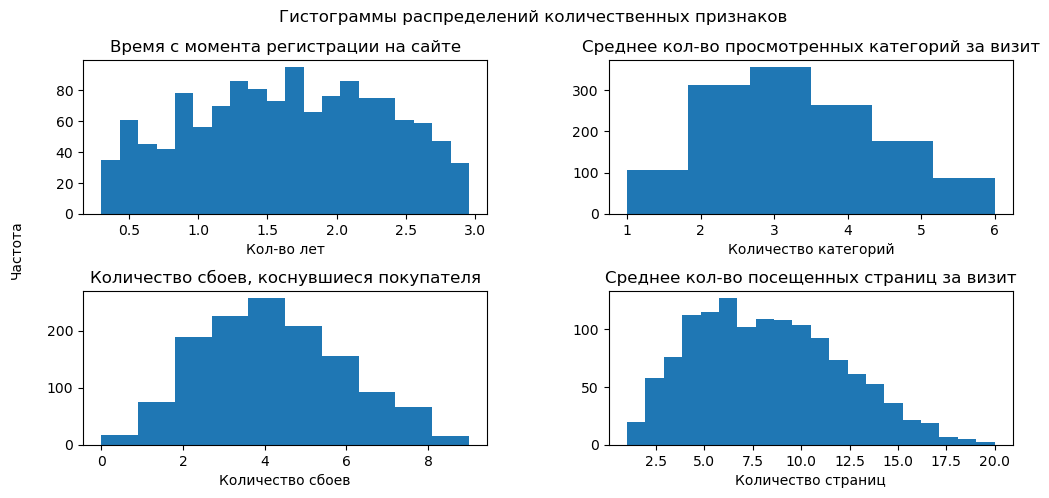

In [111]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
fig.suptitle("Гистограммы распределений количественных признаков", fontsize=12)
fig.text(0.07, 0.5, 'Частота', ha='center', va='center', rotation='vertical')

ax1.hist(main_df['duration'], bins=20)
ax1.set_title('Время с момента регистрации на сайте')
ax1.set_xlabel('Кол-во лет')

ax2.hist(main_df['mview_cats_per_visit'], bins=6)
ax2.set_title('Среднее кол-во просмотренных категорий за визит')
ax2.set_xlabel('Количество категорий')

ax3.hist(main_df['service_error'], bins=10)
ax3.set_title('Количество сбоев, коснувшиеся покупателя')
ax3.set_xlabel('Количество сбоев')

ax4.hist(main_df['pages_per_visit'], bins=20)
ax4.set_title('Среднее кол-во посещенных страниц за визит')
ax4.set_xlabel('Количество страниц')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show();

Все распределения стремятся к нормальному. Делаем следующие наблюдения:
- в среднем пользователи пробыли на сайте от полугода до 3 лет
- чаще всего пользователь посещает 3 категории за визит
- чаще всего покупатели сталкиваются с 4 сбоями
- чаще всего покупатели в среднем посещают 6-7 страниц за визит

Посмотрим также на значение статистик признаков.

In [113]:
main_df[main_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mark_comm_6_month,1300.0,4.253769,1.014814,0.90000,3.700000,4.200000,4.900000,6.600000
mark_comm_curr_month,1300.0,4.011538,0.696868,3.00000,4.000000,4.000000,4.000000,5.000000
duration,1300.0,1.649037,0.684538,0.30137,1.110959,1.660274,2.208219,2.956164
promo_purchases,1300.0,0.319808,0.249843,0.00000,0.170000,0.240000,0.300000,0.990000
mview_cats_per_visit,1300.0,3.270000,1.355350,1.00000,2.000000,3.000000,4.000000,6.000000
unpaid_products_quarter,1300.0,2.840000,1.971451,0.00000,1.000000,3.000000,4.000000,10.000000
service_error,1300.0,4.185385,1.955298,0.00000,3.000000,4.000000,6.000000,9.000000
pages_per_visit,1300.0,8.176923,3.978126,1.00000,5.000000,8.000000,11.000000,20.000000


Самый сильный разброс у признаков pages_per_visit, unpaid_products_quarter и service_error. Самый слабый у promo_purchases.

Посмотрим на распределения категориальных признаков.

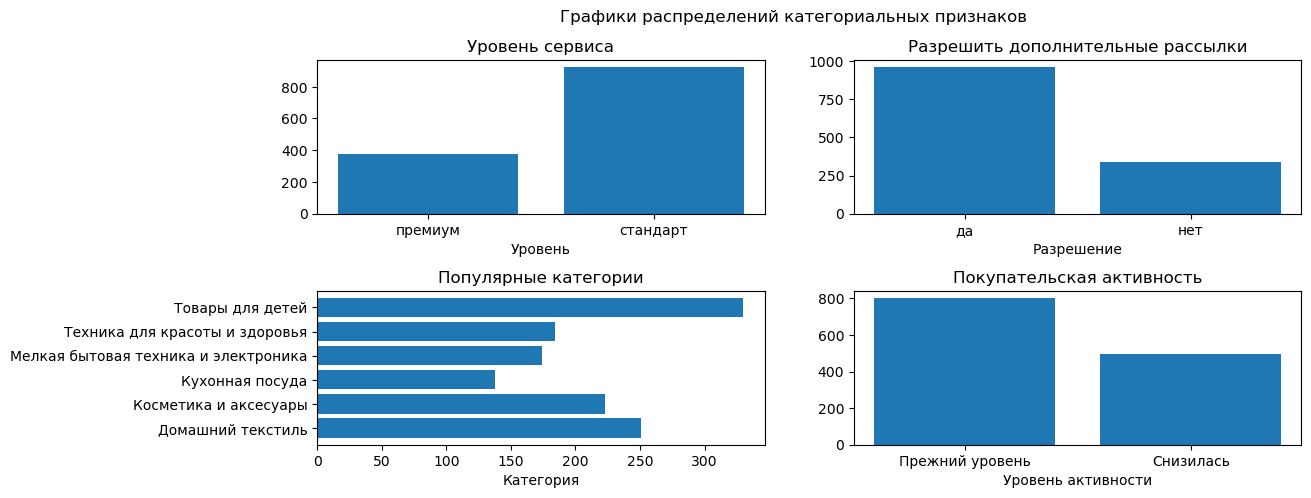

In [115]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12.7,5))
fig.suptitle("Графики распределений категориальных признаков", fontsize=12)
#fig.text(0.08, 0.5, 'Количество', ha='center', va='center', rotation='vertical')

data1 = main_df.groupby('service_type')['id'].count().reset_index()
ax1.bar(data1['service_type'], data1['id'])
ax1.set_title('Уровень сервиса')
ax1.set_xlabel('Уровень')

data2 = main_df.groupby('allow_reporting')['id'].count().reset_index()
ax2.bar(data2['allow_reporting'], data2['id'])
ax2.set_title('Разрешить дополнительные рассылки')
ax2.set_xlabel('Разрешение')

data3 = main_df.groupby('pop_category')['id'].count().reset_index()
ax3.barh(data3['pop_category'], data3['id'])
ax3.set_title('Популярные категории')
ax3.set_xlabel('Категория')
#ax3.set_xticks([1, 2, 3, 4, 5, 6], labels=main_df['pop_category'].unique(), rotation=90)

data4 = main_df.groupby('buying_activity')['id'].count().reset_index()
ax4.bar(data4['buying_activity'], data4['id'])
ax4.set_title('Покупательская активность')
ax4.set_xlabel('Уровень активности')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

Делаем следующие наблюдения:
- стандартный уровень сервиса встречается в два раза чаще, чем премиум
- около четверти пользователей запрещают дополнительные рассылки
- чаще всего среди популярных категорий встречается "товары для детей", на втором месте "домашний декстиль"
- реже всего категория "кухонная посуда"
- покупательская активность чаще остаётся на прежнем уровне, чем снижается

### total_income_df

In [118]:
total_income_df.head()

,id,period,income
0,215348,предпредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предпредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


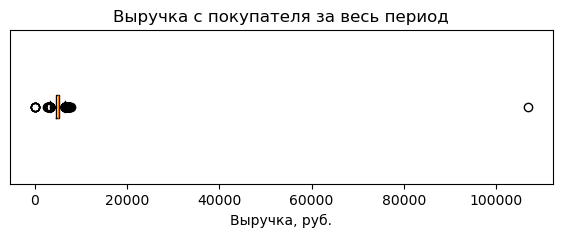

In [119]:
print_boxplot(total_income_df, 'income', 'Выручка с покупателя за весь период', 'Выручка, руб.')

In [120]:
total_income_df[(total_income_df['income'] > 100000) | (total_income_df['income'] == 0)]['income'].count()

7

Наблюдаем один явный выброс в выручке, избавимся от него, а также от выбросов со значением 0.

In [122]:
total_income_df = total_income_df[(total_income_df['income'] < 100000) & (total_income_df['income'] != 0)]

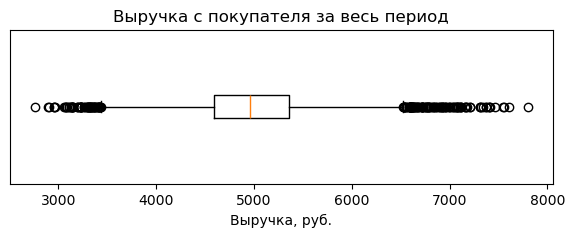

In [123]:
print_boxplot(total_income_df, 'income', 'Выручка с покупателя за весь период', 'Выручка, руб.')

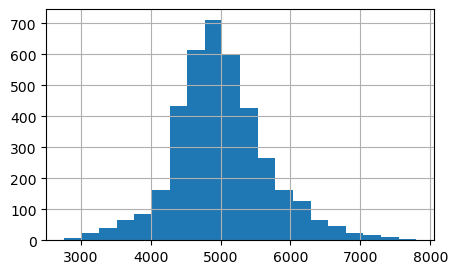

In [124]:
total_income_df['income'].hist(figsize=(5,3), bins=20);

Критичных выбросов не наблюдается. Значения выручки варьируются от 3 до 8 тысяч рублей. Чаще всего выручка находится на уровне 5000 руб.

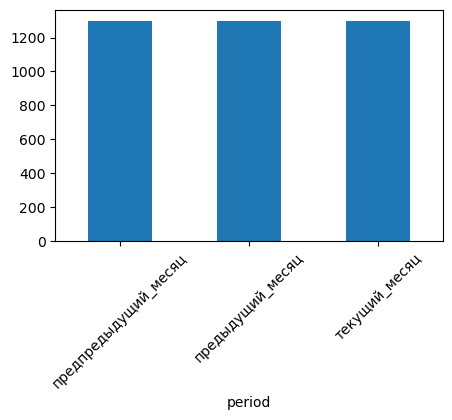

In [126]:
total_income_df.groupby('period')['period'].count().plot.bar(figsize=(5,3), rot=45);

За каждый период рассмотрено одинаковое количество клиентов.

### time_df

In [129]:
time_df.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


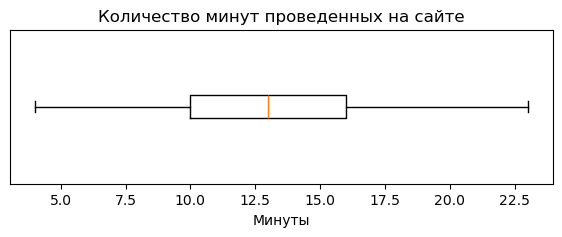

In [130]:
print_boxplot(time_df, 'minutes', 'Количество минут проведенных на сайте', 'Минуты')

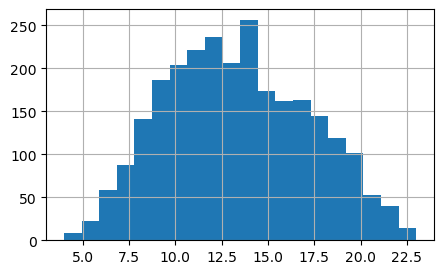

In [131]:
time_df['minutes'].hist(figsize=(5,3), bins=20);

Распределение стремится к нормальному. В среднем пользователи проводят на сайте от 5 до 22 минут. Наблюдается резкий скачок около 14 минут.

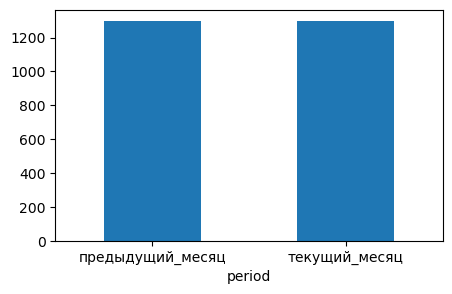

In [133]:
time_df.groupby('period')['period'].count().plot.bar(figsize=(5,3), rot=0);

Половина данных собрана за предыдущий месяц, половина за текущий.

### monthly_profit_df

In [136]:
monthly_profit_df.head()

,id,profit
0,215348,980.0
1,215349,4160.0
2,215350,3130.0
3,215351,4870.0
4,215352,4210.0


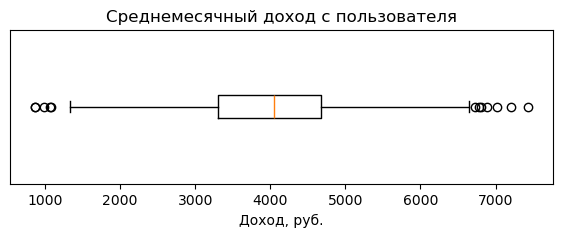

In [137]:
print_boxplot(monthly_profit_df, 'profit', 'Среднемесячный доход с пользователя', 'Доход, руб.')

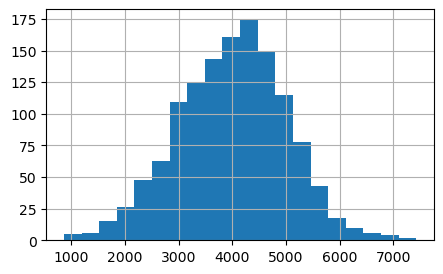

In [138]:
monthly_profit_df['profit'].hist(figsize=(5,3), bins=20);

Критичных выбросов не наблюдается, значения распределены нормально, варьируются от 1к до 7к рублей, самое часто встречаемое значение около 4к рублей в месяц.

### Промежуточные выводы

main:
- у всех оставленных клиентов покупательская активность не менее 3 месяцев, поскольку записи с прибылью 0 были удалены из рассмотрения
- большинство признаков стремиться к нормальному распределению
- чаще всего за последние 6 месяцев с клиентами совершалось 4 маркетинговые коммуникации
- в текущем месяце также чаще всего совершалось 4 коммуникации
- пользователей можно разделить на группы по доле совершаемых покупок по акции: менее половины и более половины
- чаще всего пользователи совершают около трети покупок по акции
- чаще всего пользователи не оплачивают 2-3 товара

main время, категории, сбои, страницы:
- в среднем пользователи пробыли на сайте от полугода до 3 лет
- чаще всего пользователь посещает 3 категории за визит
- чаще всего покупатели сталкиваются с 4 сбоями
- чаще всего покупатели в среднем посещают 6-7 страниц за визит

main разброс:
- самый сильный разброс у признаков pages_per_visit, unpaid_products_quarter и service_error
- самый слабый у promo_purchases

main категориальные признаки:
- стандартный уровень сервиса встречается в два раза чаще, чем премиум
- около четверти пользователей запрещают дополнительные рассылки
- чаще всего среди популярных категорий встречается "товары для детей", на втором месте "домашний декстиль"
- реже всего категория "кухонная посуда"
- покупательская активность чаще остаётся на прежнем уровне, чем снижается

time, profit:
- значения выручки за весь период варьируются от 3 до 8 тысяч рублей
- чаще всего выручка за весь период находится на уровне 5000 руб
- в среднем пользователи проводят на сайте от 5 до 22 минут
- чаще всего проводят около 14 минут
- среднемесяный доход около 1к-7к рублей
- самое часто встречаемое значение около 4к рублей в месяц

## Объединение таблиц

Объединим таблицы main_df, total_income_df и time_df.

В таблицах total_income_df и time_df создадим отдельные столбцы для каждого периода.

In [143]:
# Преобразуем таблицу так, чтобы в одной строке находился один id
total_income_pivot = total_income_df.pivot_table(index='id', columns='period', values='income').reset_index()

# переименуем столбцы
total_income_pivot.columns = ['id', 'preprevious_month_income', 'previous_month_income', 'current_month_income']

# заполним пропуски нулями
#total_income_pivot = total_income_pivot.fillna(0)

# удалим пропуски
total_income_pivot = total_income_pivot.dropna()

# узнаем размер получившейся таблицы и выведем её на экран
print(total_income_pivot.shape[0])
total_income_pivot.head()

1296


,id,preprevious_month_income,previous_month_income,current_month_income
1,215349,4472.0,5216.0,4971.6
2,215350,4826.0,5457.5,5058.4
3,215351,4793.0,6158.0,6610.4
4,215352,4594.0,5807.5,5872.5
5,215353,5124.0,4738.5,5388.5


In [144]:
# Преобразуем таблицу так, чтобы в одной строке находился один id
time_pivot = time_df.pivot_table(index='id', columns='period', values='minutes').reset_index()

# переименуем столбцы
time_pivot.columns = ['id', 'previous_month_minutes', 'current_month_minutes']

# заполним пропуски нулями
#time_pivot = time_pivot.fillna(0)

# удалим пропуски
time_pivot = time_pivot.dropna()

# узнаем размер получившейся таблицы и выведем её на экран
print(time_pivot.shape[0])
time_pivot.head()

1300


,id,previous_month_minutes,current_month_minutes
0,215348,13.0,14.0
1,215349,12.0,10.0
2,215350,8.0,13.0
3,215351,11.0,13.0
4,215352,8.0,11.0


Объединим таблицы.

In [146]:
main_df = main_df.merge(total_income_pivot, how='left', on='id').merge(time_pivot, how='left', on='id')
main_df.head()

,id,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,unpaid_products_quarter,service_error,pages_per_visit,preprevious_month_income,previous_month_income,current_month_income,previous_month_minutes,current_month_minutes
0,215348,Снизилась,премиум,да,3.4,5,0.331507,0.00,Товары для детей,6,2,1,5,NaN,NaN,NaN,13.0,14.0
1,215349,Снизилась,премиум,да,4.4,4,2.243836,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12.0,10.0
2,215350,Снизилась,стандарт,нет,4.9,3,1.476712,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8.0,13.0
3,215351,Снизилась,стандарт,да,3.2,5,2.454795,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11.0,13.0
4,215352,Снизилась,стандарт,нет,5.1,3,2.915068,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8.0,11.0


Объединение прошло успешно. Проверим есть ли пропуски в данных.

In [148]:
main_df.isna().sum()

id                          0
buying_activity             0
service_type                0
allow_reporting             0
mark_comm_6_month           0
mark_comm_curr_month        0
duration                    0
promo_purchases             0
pop_category                0
mview_cats_per_visit        0
unpaid_products_quarter     0
service_error               0
pages_per_visit             0
preprevious_month_income    4
previous_month_income       4
current_month_income        4
previous_month_minutes      0
current_month_minutes       0
dtype: int64

Обнаружены несколько пропусков, избавимся от них.

Заменим индекс на столбец ID.

In [150]:
main_df = main_df.dropna()

In [151]:
main_df = main_df.set_index('id')
main_df.head()

,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,unpaid_products_quarter,service_error,pages_per_visit,preprevious_month_income,previous_month_income,current_month_income,previous_month_minutes,current_month_minutes
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,2.243836,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12.0,10.0
215350,Снизилась,стандарт,нет,4.9,3,1.476712,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8.0,13.0
215351,Снизилась,стандарт,да,3.2,5,2.454795,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11.0,13.0
215352,Снизилась,стандарт,нет,5.1,3,2.915068,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8.0,11.0
215353,Снизилась,стандарт,да,3.3,4,2.087671,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10.0,10.0


## Корреляционный анализ

In [153]:
# создадим списки количественных и категориальных признаков
numerical_columns = main_df.select_dtypes(include='number').columns.tolist()

categorial_columns = main_df.select_dtypes(exclude='number').columns.tolist()
categorial_columns.remove('buying_activity')

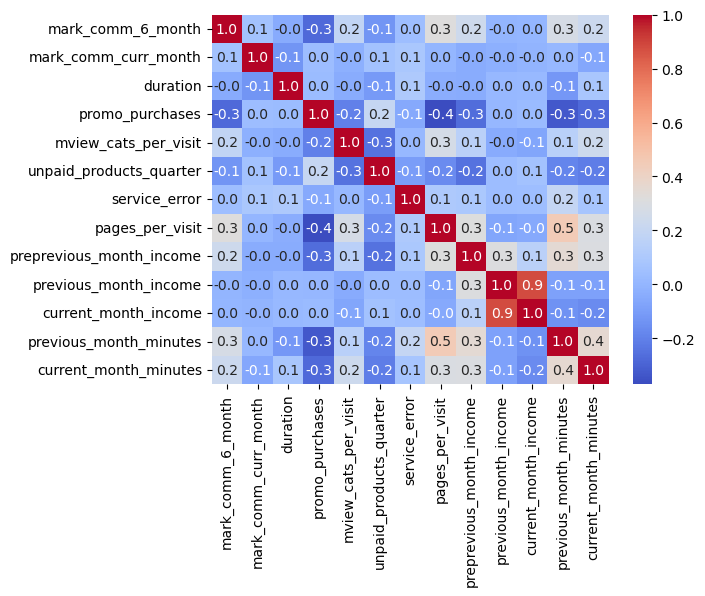

In [154]:
corr = main_df[numerical_columns].corr(method='spearman')
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot_kws={"fontsize":10},
            fmt=".1f",
            annot=True);

Между собой сильно коррелируют признаки current_month_minutes и previous_month_minutes, что говорит о мультиколлинеарности. Это может объясняться тем, что из месяца в месяц пользователь проводит примерно одинаковое количество времени на сайте. Чтобы избавиться от неё удалим один из данных признаков.

In [156]:
main_df = main_df.drop(columns='previous_month_minutes')
numerical_columns.remove('previous_month_minutes')

Также наблюдаем умеренную корреляцию признаков current, previous и preprevious month_income. Также наблюдается слабая корреляция у некоторых других признаков, что уже не является интересной для нас информацией.

Посмотрим на корреляцию всех признаков.

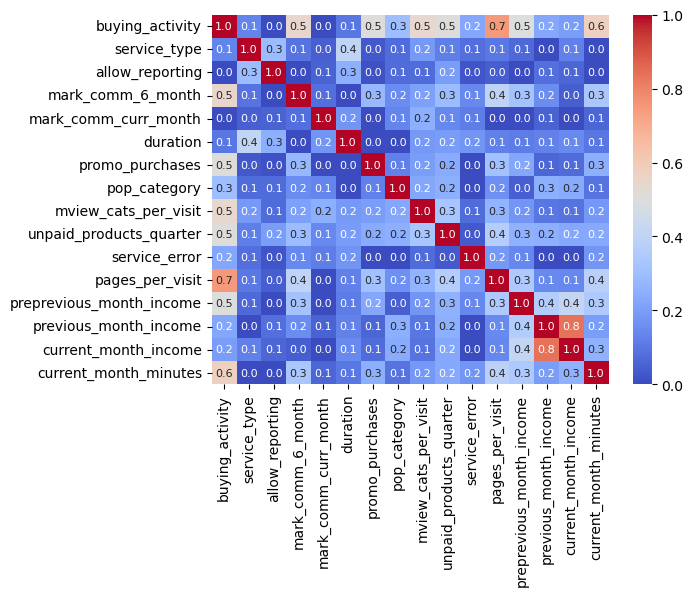

In [158]:
phik_corr = main_df.phik_matrix(interval_cols=numerical_columns)
sns.heatmap(phik_corr,
            xticklabels=phik_corr.columns.values,
            yticklabels=phik_corr.columns.values,
            cmap='coolwarm',
            annot_kws={"fontsize":8},
            fmt=".1f",
            annot=True);

Наблюдаем, что целевой признак buying_activity сильнее всего коррелирует с pages_per_visit и mark_comm_6_month. То есть целевой признак сильнее всего зависит от количества посещенных страниц за визит и количества маркетинговых коммуникаций за последние 6 месяцев.

Целевой признак также умеренно коррелирует с promo_purchases, mview_cats_per_visit, unpaid_products_quarter. С остальными признаками наблюдается слабая корреляция или её отсутствие.

Между самими признаками наблюдается умеренная, слабая или отсутствие корреляции.

### Промежуточные выводы
Целевой признак сильнее всего зависит от количества посещенных страниц за визит и количества маркетинговых коммуникаций за последние 6 месяцев.

## Использование пайплайнов

Разделим данные на тренировочную и тестовую выборки.

In [163]:
# задаём размер тестовой выборки и random_state
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = main_df.drop(columns='buying_activity')
y = main_df['buying_activity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

# закодируем целевую переменную
labencoder = LabelEncoder()
labencoder.fit(y_train)

y_train = labencoder.transform(y_train)
y_test = labencoder.transform(y_test)
#print(f'object: {y.iloc[0]} class: {y_test[0]}')
labencoder.classes_

array(['Прежний уровень', 'Снизилась'], dtype=object)

Запомним, что в целевом признаке категории "снизилась" придаётся значение 0. Подготовим пайплан.

Сначала обозначим, какие признаки требуют кодирования, а какие масштабирования.

In [165]:
ohe_columns = [
    'allow_reporting',
    'pop_category'
]

ord_columns = ['service_type']

num_columns = numerical_columns

Добавляем OHE-кодирование в пайплайн. В наших данных нет пропусков, как мы убедились ранее, но пайплайн будем строить с учётом работы на возможных новых данных, поэтому обработку пропусков не забываем. Пропуски заполняем самым часто встречающимся значением.

In [167]:
# SimpleImputer + OHE
# Added in version 1.2: sparse was renamed to sparse_output.
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

Добавляем Ordinal-кодирование в пайплайн. Заполняем пропуски до кодирования (самым частым значением), кодируем и затем заполняем пропуски после кодирования. Также зададим порядок категоризации.

In [169]:
# SimpleImputer + ORD + SimpleImputer
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

Объединяем шаги подготовки. Объединим кодирование и масштабирование в один пайплайн с подготовкой данных. Аргумент remainder='passthrough' позволит не применять шаги пайплайна к признакам, которые не вошли в списки, и они останутся без изменений.

In [171]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создаём итоговый пайплайн для обучения модели.

In [258]:
# итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression(n_jobs=-1))
    ]
)

Для автоматического подбора гиперпараметров будем использовать инструмент RandomizedSearchCV. В словаре укажем, какие варианты масштабирования собираемся перебрать. Их три: варианты с разными методами и один вариант без масштабирования. 

В словарь гиперпараметров param_grid добавим модели, которые хотим использовать: DecisionTreeClassifier(), SVС(), KNeighborsClassifier() и LogisticRegression().

Перебираем гиперпараметры моделей. В каждом словаре указываем название модели, её гиперпараметры, метод масштабирования.

In [87]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_split': range(2,11),
        'models__min_samples_leaf': range(1,11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(0,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__n_jobs': range(1,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [88]:
main_df.groupby('buying_activity')['buying_activity'].count() / main_df.shape[0]

buying_activity
Прежний уровень    0.618827
Снизилась          0.381173
Name: buying_activity, dtype: float64

В качестве метрики выберем roc_auc, поскольку у нас наблюдается дисбаланс классов.

In [89]:
# задаём случайный поиск
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

Обучаем случайный поиск на тренировочной выборке.

In [90]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['allow_reporting',
                                                                                'pop_category']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(0, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__n_jobs': range(1, 4),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [91]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['allow_reporting',
                                                   'pop_category']),
                                                 ('ord',
                                            

Модель показывает достаточно хорошее качество.

Выполним предсказания на нашей лучшей модели.

In [92]:
best_model = randomized_search.best_estimator_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

data_preprocessor.fit(X_train)
#best_model.steps[1][1].feature_names_in_ = data_preprocessor.get_feature_names_out()
best_model.steps[1][1].feature_names_in_ = feature_names
type(best_model)

sklearn.pipeline.Pipeline

In [93]:
preds = randomized_search.best_estimator_.predict(X_test)
proba_one = randomized_search.best_estimator_.predict_proba(X_test)[:,1]

acc = roc_auc_score(y_test, proba_one)
print(acc) 

0.8739028435060471


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Получили хорошее качество модели на тестовых данных, чуть выше, чем на тренировочных.

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности.

In [94]:
model_preprocessor = best_model.named_steps['preprocessor']
X_test_scalled =  pd.DataFrame(model_preprocessor.transform(X_test), columns = feature_names)
#feature_names = data_preprocessor.get_feature_names_out()

# сформируем таблицу важности признаков
feature_importances = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance': best_model.steps[1][1].feature_importances_
    })

# сортируем таблицу по важности — от большей к меньшей
print(feature_importances.sort_values('Importance', ascending=False))

                                              Feature  Importance
14                               num__pages_per_visit    0.513740
18                         num__current_month_minutes    0.199628
10                               num__promo_purchases    0.115925
7                              num__mark_comm_6_month    0.034828
11                          num__mview_cats_per_visit    0.032621
12                       num__unpaid_products_quarter    0.030020
15                      num__preprevious_month_income    0.029569
9                                       num__duration    0.013283
13                                 num__service_error    0.012853
1             ohe__pop_category_Косметика и аксесуары    0.010775
17                          num__current_month_income    0.006076
8                           num__mark_comm_curr_month    0.000682
6                                   ord__service_type    0.000000
5                  ohe__pop_category_Товары для детей    0.000000
4    ohe__

Модель опирается на три самых важных признака: количество страниц за визит, количество минут на сайте и количество покупок по акции акции.

Проанализируем SHAP значения. Построим график общей значимости признаков.

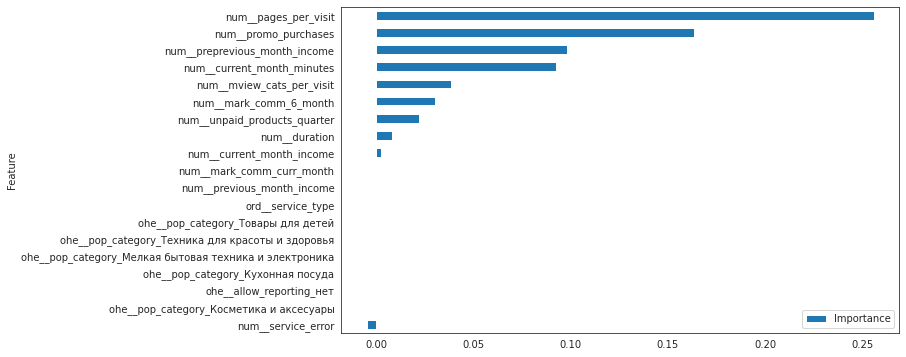

In [95]:
def custom_f1(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

result = permutation_importance(best_model.steps[1][1], X_test_scalled, y_test, scoring=custom_f1)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

Выводы:
- Для модели важна выручка от пользователя за предпредыдущий месяц, выручка же за текущий и предыдущий месяцы не важна
- Самый важный признак количество минут проведенных на сайте
- На втором месте по важности количество посещенных страниц
- Третье место занимает выручка за предпредыдущий месяц
- Также наблюдаются средующие не важные признаки: количество маркетинговых коммуникаций за текущий месяц, популярные категории, разрешение на дополнительные рассылки

При моделировании возможно стоит не использовать самые не важные признаки.

Бизнесу стоит обратить внимание на выручку за 2 месяца до текущего момента, количество посещенных страниц за визит и количество минут проведенных на сайте.

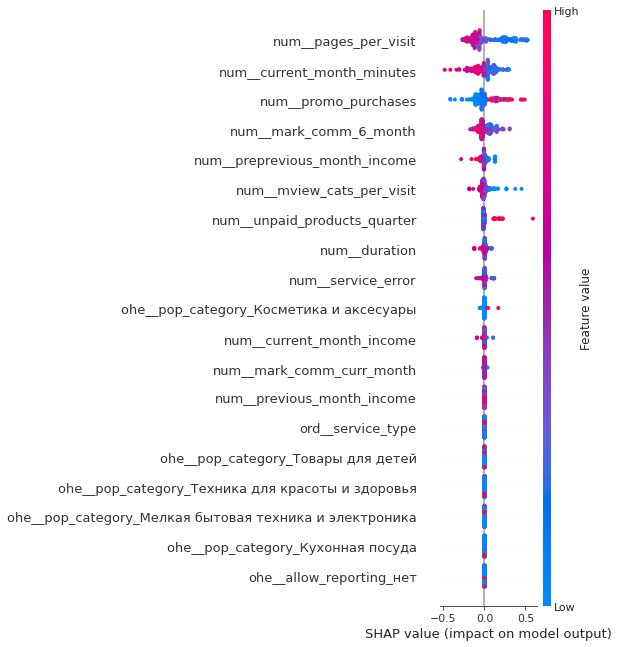

In [96]:
explainer = shap.TreeExplainer(best_model.steps[1][1])
shap_values = explainer(X_test_scalled)
feature_names = data_preprocessor.get_feature_names_out()
shap.summary_plot(shap_values[:,:,1], features=X_test_scalled, feature_names=feature_names)

_класс 1 - снизилась, класс 0 - осталась на прежнем уровне_

Вероятность отнести покупателя к классу 1, то есть к снижению, повышется вместе с:
- снижением количества просмотренных страниц за посещение
- снижением количества минут на сайте
- снижением дохода за предпредпоследний месяц

**Выводы:**
Учитывая важность признаков, бизнесу можно посоветовать среди тех покупателей, кто склонен к снижению:
- Поработать над количеством предлагаемых акций. Неизвестно как покупатель отреагирует на резкое их сокращение, поэтому стоит провести более детальный анализ.
- Повысилить количество маркетинговых коммуникаций
- Подумать как сделать так, чтобы клиент просматривал больше страниц и больше категорий за одно посещение сайта

## Сегментация покупателей

Найдем вероястность отношения каждого покупателя из датасета к классу 1 (снизилась). Также добавим к таблице данные о прибыльности покупателей за последние 6 месяцев.

In [97]:
#data_scalled = pd.DataFrame(data_preprocessor.transform(X), columns = data_preprocessor.get_feature_names_out())
df = main_df.copy()
df = df.merge(monthly_profit_df, how='left', on='id')

df['proba'] = best_model.predict_proba(X)[:,1] #best_model.steps[1][1].predict_proba(data_scalled)[:,1]

df.head()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,id,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,unpaid_products_quarter,service_error,pages_per_visit,preprevious_month_income,previous_month_income,current_month_income,current_month_minutes,profit,proba
0,215349,Снизилась,премиум,да,4.4,4,2.243836,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,10,4160.0,0.500000
1,215350,Снизилась,стандарт,нет,4.9,3,1.476712,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,13,3130.0,0.272727
2,215351,Снизилась,стандарт,да,3.2,5,2.454795,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,13,4870.0,0.923077
3,215352,Снизилась,стандарт,нет,5.1,3,2.915068,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,11,4210.0,0.833333
4,215353,Снизилась,стандарт,да,3.3,4,2.087671,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,3950.0,0.428571


In [98]:
print(f'Средний уровень прибыли: {round(df["profit"].mean())}')

Средний уровень прибыли: 3998


Выделим следующие сегменты покупателей:
- с высоким уровнем риска ухода (более 0.5) и высоким уровнем прибыли (выше 4000)
- с высоким уровнем риска ухода (более 0.5) и низким уровнем прибыли (ниже 4000)
- с низким уровнем риска ухода (менее 0.5) и высоким уровнем прибыли (выше 4000)
- с низким уровнем риска ухода (менее 0.5) и низким уровнем прибыли (ниже 4000)

In [99]:
df['risk_of_leaving'] = df['proba'].apply(lambda x: 'высокий' if x >= 0.5 else 'низкий')
df['profit_level'] = df['profit'].apply(lambda x: 'хороший' if x >= 4000 else 'нормальный')
df.head()

,id,buying_activity,service_type,allow_reporting,mark_comm_6_month,mark_comm_curr_month,duration,promo_purchases,pop_category,mview_cats_per_visit,...,service_error,pages_per_visit,preprevious_month_income,previous_month_income,current_month_income,current_month_minutes,profit,proba,risk_of_leaving,profit_level
0,215349,Снизилась,премиум,да,4.4,4,2.243836,0.75,Товары для детей,4,...,2,5,4472.0,5216.0,4971.6,10,4160.0,0.500000,высокий,хороший
1,215350,Снизилась,стандарт,нет,4.9,3,1.476712,0.14,Домашний текстиль,5,...,1,5,4826.0,5457.5,5058.4,13,3130.0,0.272727,низкий,нормальный
2,215351,Снизилась,стандарт,да,3.2,5,2.454795,0.99,Товары для детей,5,...,6,4,4793.0,6158.0,6610.4,13,4870.0,0.923077,высокий,хороший
3,215352,Снизилась,стандарт,нет,5.1,3,2.915068,0.94,Товары для детей,3,...,3,2,4594.0,5807.5,5872.5,11,4210.0,0.833333,высокий,хороший
4,215353,Снизилась,стандарт,да,3.3,4,2.087671,0.26,Домашний текстиль,4,...,1,4,5124.0,4738.5,5388.5,10,3950.0,0.428571,низкий,нормальный


Проведём анализ группы покупателей с высоким риском снижения активности и хорошим уровнем прибыли.

In [100]:
risk = df[(df['risk_of_leaving'] == 'высокий') & (df['profit_level'] == 'хороший')]
risk.shape[0]

218

Имеются почти 500 покупателей с данными показателями. Проведём анализ признаков.

Посмотрим какие категории чаще всего посещают покупатели из группы риска.

In [101]:
cats = risk.groupby('pop_category')['id'].count().reset_index()
cats.columns = ['pop_category', 'count']
cats['prop'] = round(cats['count'] / risk.shape[0], 2)
cats = cats.sort_values(by='count', ascending=False)
cats

,pop_category,count,prop
5,Товары для детей,70,0.32
1,Косметика и аксесуары,50,0.23
0,Домашний текстиль,34,0.16
2,Кухонная посуда,24,0.11
4,Техника для красоты и здоровья,24,0.11
3,Мелкая бытовая техника и электроника,16,0.07


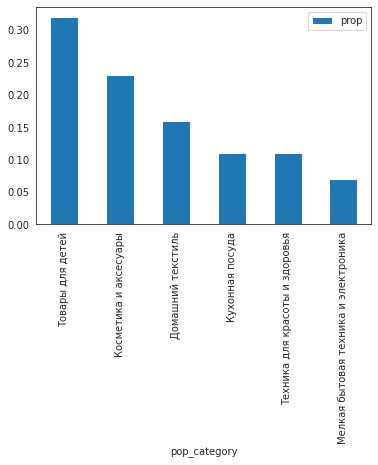

In [102]:
cats.plot.bar(x='pop_category', y='prop');

Среди покупателей из зоны риска лидируют категории Товары для детей и Косметика и аксесуары. Можно вполне смело выдвинуть предположение, что большей частью этих покупателей являются мамы в декрете, если получить информацию о поле и возрасте покупателя, то данное заявление можно будет делать ещё смелее. Женщинам в декрете некогда долго листать страницы сайта, потому что их постоянно отвлекают заботы о детях, поэтому бизнесу можно посоветовать подготовить шаблонные заказы, возможно те, которые покупатель уже совершал ранее, тогда у покупателя сократиться время на формирование заказа и вероятность снижения активности стизится.

Посмотрим каким уровнем сервиса пользуются покупатели из зоны риска.

In [103]:
serv = risk.groupby('service_type')['id'].count().reset_index()
serv.columns = ['service_type', 'count']
serv['prop'] = round(serv['count'] / risk.shape[0], 2)
serv = serv.sort_values(by='count', ascending=False)
serv

,service_type,count,prop
1,стандарт,147,0.67
0,премиум,71,0.33


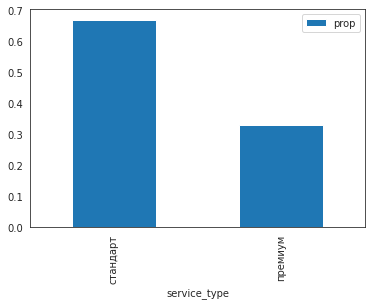

In [104]:
serv.plot.bar(x='service_type', y='prop');

Большая часть покупателей пользуется стандартным уровнем сервиса, возможно стоит пересмотреть политику предоставления премиума.

Посмотрим на последнюю категорию "дополнительные рассылки".

In [105]:
rept = risk.groupby('allow_reporting')['id'].count().reset_index()
rept.columns = ['allow_reporting', 'count']
rept['prop'] = round(rept['count'] / risk.shape[0], 2)
rept = rept.sort_values(by='count', ascending=False)
rept

,allow_reporting,count,prop
0,да,161,0.74
1,нет,57,0.26


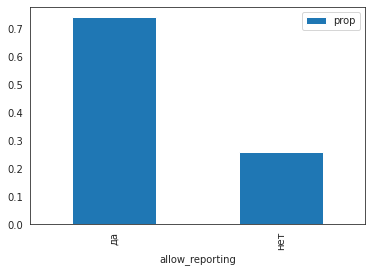

In [106]:
rept.plot.bar(x='allow_reporting', y='prop');

Большинство покупателей позволяют отправлять им дополнительные рассылки, что если данные рассылки не информативны или неинтересны покупателям? Возможно стоит пересмотреть содержание и индивидуальный подход в рассылках.

## Общий вывод

**Целью исследования являлось:**

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Были сделаны следующие выводы:**
- Покупательская активность сильнее всего зависит от количества посещенных страниц за визит и количества минут проведенных на сайте и доходом за 2 месяца назад
- Лучшей моделью оказалось Дерево Решений со следующими параметрами: max_depth=7, min_samples_leaf=10, min_samples_split=4
- Лучшая модель показала метрику около 85% верных ответов на тестовой выборке

Вероятность отнести покупателя к снижению активности, повышется вместе с:
- снижением количества просмотренных страниц за посещение
- снижением количества минут на сайте
- снижением дохода за предпредпоследний месяц

Учитывая важность признаков, бизнесу можно посоветовать среди тех покупателей, кто склонен к снижению:
- Поработать над количеством предлагаемых акций. Неизвестно как покупатель отреагирует на резкое их сокращение, поэтому стоит провести более детальный анализ.
- Повысилить количество маркетинговых коммуникаций
- Подумать как сделать так, чтобы клиент просматривал больше страниц и больше категорий за одно посещение сайта

Был выделен сегмент покупателей **с высоким риском ухода и высоким уровнем прибыли**. Для данного сегмента выдвинуты следующие предложения:
- Среди покупателей из зоны риска лидируют категории Товары для детей и Косметика и аксесуары
- Если предполагать, что большая часть покупателей мамы в декрете с детьми, то стоит поработать над заранее подготовленными готовыми заказами в один клик
- Для дальнейших исследований была бы полезна информация о возрасте и поле покупателя
- Большая часть покупателей пользуется стандартным уровнем сервиса, возможно стоит пересмотреть политику предоставления премиума
- Большинство покупателей позволяют отправлять им дополнительные рассылки, возможно стоит пересмотреть содержание и индивидуальный подход в рассылках

**Дополнительные выводы:**
- Среди покупателей, которые совершают более половины покупок по акции доля снижающейся активности составляет около 80%
- в таблице `main_df` 1300 записей без пропусков и дубликатов
- в таблице `total_income_df` 3895 записей, устранены опечатки, пропусков и дубликатов нет
- в таблице `time_df` 2600 записей, устранены опечатки, без пропусков и дубликатов
- в таблице `monthly_profit_df` 1300 записей без пропусков и дубликатов, значения дохода переведены из тысяч рублей в рубли

**Дополнительные выводы:**

основные:
- чаще всего за последние 6 месяцев с клиентами совершалось 4 маркетинговые коммуникации
- в текущем месяце также чаще всего совершалось 4 коммуникации
- пользователей можно разделить на группы по доле совершаемых покупок по акции: менее половины и более половины
- чаще всего пользователи совершают около трети покупок по акции
- чаще всего пользователи не оплачивают 2-3 товара

время, категории, сбои, страницы:
- в среднем пользователи пробыли на сайте от полугода до 3 лет
- чаще всего пользователь посещает 3 категории за визит
- чаще всего покупатели сталкиваются с 4 сбоями
- чаще всего покупатели в среднем посещают 6-7 страниц за визит

категории:
- стандартный уровень сервиса встречается в два раза чаще, чем премиум
- около четверти пользователей запрещают дополнительные рассылки
- чаще всего среди популярных категорий встречается "товары для детей", на втором месте "домашний декстиль"
- реже всего категория "кухонная посуда"
- покупательская активность чаще остаётся на прежнем уровне, чем снижается

минуты на сайте, выручка:
- значения выручки за весь период варьируются от 3 до 8 тысяч рублей
- чаще всего выручка за весь период находится на уровне 5000 руб
- в среднем пользователи проводят на сайте от 5 до 22 минут
- чаще всего проводят около 14 минут
- среднемесяный доход около 1к-7к рублей
- самое часто встречаемое значение около 4к рублей в месяц